In [1]:
from utils import *
from matplotlib import pyplot as plt
import numpy as np
from numpy.fft import fft, fftshift, ifft, ifftshift

In [2]:
# generate object
setup = {
    'N': 8192,
    'L': 2e-3, # 1mm
    'lambda_0': 650e-9, # 650nm, red light
    'f1': 45e-3, # 45mm
    'f2': 25e-3, # 25mm
    'A': 5e-3, # 5mm
    'plot': False
}
n = setup['N']
sample_size = 4096
sample = test_sum(sample_size, a=255, n_cycles=128, sigma=0.1)
object = np.zeros(n, dtype=np.complex128)
object = center_splice(object, sample)

In [3]:
n_pos = 31
index = [0] + np.array([(-1)**(i+1)*np.ceil(i/2) for i in range(1, n_pos)]).tolist()
offset = -200
aperture = 800
images = [(i, fftshift(fft(fftshift(object[int(n/2) + int(i*offset) - int(aperture/2):int(n/2) + int(i*offset) + int(aperture/2)])))) for i in index]

In [4]:
recon = reconstruct_gs(images, offset, 8192, 3)

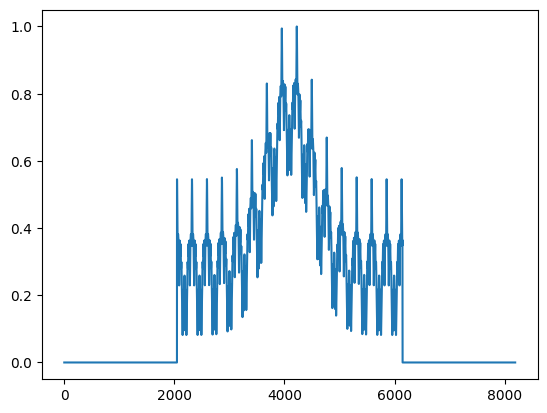

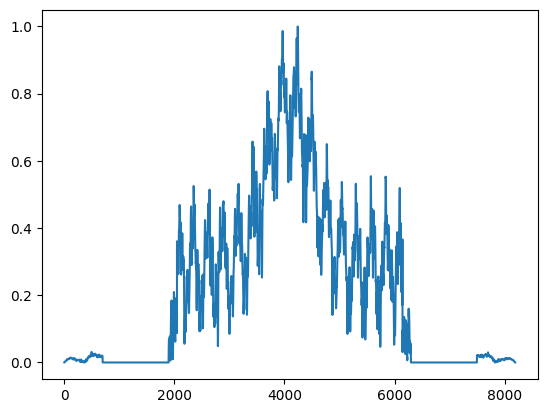

In [5]:
plt.plot(np.abs(normalize(object)))
plt.figure()
plt.plot(np.abs(normalize(recon)))

In [7]:
print(mse(np.abs(normalize(object[2048:6144])), np.abs(normalize(recon[2048:6144]))))

0.007415847677929412
